# Fundamentals of Data Analysis Project 2020

## Table of contents
1. [Introduction](#introduction)

2. [Linear Regression](#linreg)

    2.1 [Preprocessing](#preproc)
    
    2.2 [Algorithm](#alg)
    
    2.3 [Predictions](#pred)
    
3. [Sigmoid Regression](#sigreg)
    
    3.1 [Preprocessing](#preproc2)
    
    3.2 [Algorithm](#alg2)
    
    3.3 [Predictions](#pred2)
    
4. [Discussion](#discussion)
    
5. [References](#references)

## Introduction <a name=introduction></a>
The goal of this project is to make 2 predictive models which predict wind turbine power from wind turbine speed. The two models are the linear regression model and the sigmoid regressionmodel. 

## Linear regression <a name=linreg></a>
This project will use the the linear_model function from the sklearn package to perform the linear regerssion. 

This function takes the input values (x) and generates a predicted value (y) using the formula y = ax + b, where a and b are coefficients that are fit using Ordinary Least Squares.

Ordinary Least Squares works by choosing the coefficients that minimise the difference between the observed and predicted values of the dataset [1](#1). The observed values are the actual target values of y and the predicted alues are the values generated by the formula y = ax + b.

### Preprocessing <a name=preproc></a>
First the data is imported and preprocessed. The preprocessing consists in splitting up the data into feature data (x values) and labels (y values) and rehsaping the X values as the LinearRegression() from linear_model function does not take a 1D array for the X values. First, a scatter plot of power versus speed is done:

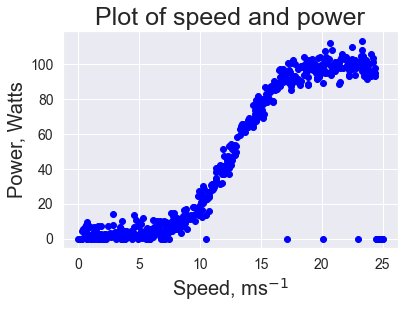

In [35]:
# import data 
import pandas as pd
import matplotlib.pyplot as plt
# seaborn to make plot look nice
import seaborn as sns
sns.set()

# read in csv file power production into
# dataframe
lin_data = pd.read_csv('powerproduction.csv')

# X and y values for regression
X = lin_data.iloc[:, 0].values
y = lin_data.iloc[:, 1].values

def scatter_plot(X, y, col, mark, lab):
    # scatter plot of data set
    plt.scatter(X, y, color=col, marker=mark, label=lab);

    # Title of plot
    plt.title("Plot of speed and power", fontsize=25)
    
    # the x label of plot
    plt.xlabel("Speed, ms$^{-1}$", fontsize=20)
    
    # the y label of plot
    plt.ylabel("Power, Watts", fontsize=20)
    
    # change size of ticks of x and y axes
    ax = plt.gca()
    ax.tick_params(axis = 'both',which = 'major', labelsize = 14)
    
scatter_plot(X, y, "blue", 'o', 'power')

As before in the Machine Learning and Statistics project, the plot resembles the sigmoid function [2](#2)  . There are outliers clearly present in the scatter plot. The appropriate method to deal with outliers varies from dataset to dataset. In this case, it is clear that several of the outliers (near power=0 Watts, after speed = 10ms<sup>-1</sup>) are unrelated to the apparent shape of the data and might be mistakes. As such, it is appropriate to remove them [3](#3).

In [37]:
# identifying rows where power = 0 and speed > 10
lin_data.loc[(lin_data['power'] == 0 ) & (lin_data['speed'] > 10)]

,speed,power
208,10.511,0.0
340,17.167,0.0
404,20.095,0.0
456,22.998,0.0
490,24.499,0.0
491,24.525,0.0
492,24.575,0.0
493,24.650,0.0
494,24.750,0.0
495,24.775,0.0


In [38]:
# remove rows by row numbers
lin_data = lin_data.drop([208, 340, 404, 456, 490, 491, 492, 493, 494, 495, 496, 497, 498, 499]);
# check if rows have been removed
lin_data.loc[(lin_data['power'] == 0 ) & (lin_data['speed'] > 10)].size

0

The outliers have been successfully removed from the dataset. They can now be reshaped as outlined at the start of this section:

In [39]:
# X and y values for regression
X = lin_data.iloc[:, 0].values
y = lin_data.iloc[:, 1].values

# The X values are reshaped as 
# they only contain one feature
X = X.reshape(-1, 1)

### Algorithm <a name=alg></a>
The train_test_split function is defined usnig the model_selection module from the sklearn package. This is used to randomly split the data into training and testing data.
The LinearRegression function is defined and used to fit a regressor to the X_train and y_train datasets.

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

-20.13186984928337
[5.63261221]


### Predictions  <a name=pred></a>
The predicted values are calculated using the regressor and the X_test testing data. Then various metrics (mean absolute error, mean squared error and root mean squared error) are calculated to test the efficacy of the model. In addition, the coefficient of variation (the root mean squared error RMSE as a percentage of the mean of the observed values) is calculated.

In [41]:
from sklearn import metrics
import numpy as np
y_pred = regressor.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean of observed y values:', np.mean(y))
# coefficient of variation 
print('Coefficient of variation:', (100*np.sqrt(metrics.mean_squared_error(y_test, y_pred)))/np.mean(y))

Mean Absolute Error: 11.293006536456128
Mean Squared Error: 169.0910962735623
Root Mean Squared Error: 13.00350323080524
Mean of observed y values: 49.397720164609055
Coefficient of variation: 26.32409590457494


The coefficient of variation is 26.32%. A good coefficient of variation is considered to be less than 25% [4](#4) so the linear regression is very close to being an accurate model but does not meet the threshold.

A visualisation of the predicted y values with the observed y values is as follows:

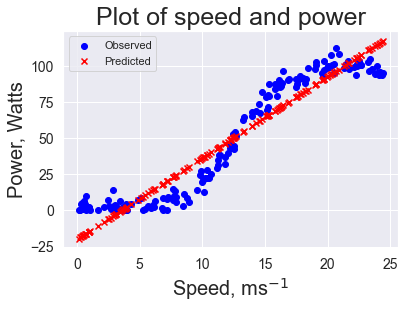

In [43]:
scatter_plot(X_test, y_test, "blue", "o", "Observed")
scatter_plot(X_test, y_pred, "red", "x", "Predicted")
plt.legend()
plt.show()

It is clear from the plot that the linear regression model is not very accurate.

## Sigmoid regression <a name=sigreg></a>
As stated in the Preprocessing subsection of the Linear Regression section, the function resembles a sigmoid function. A sigmoid function resembles an S shaped curve. It often appears as the integral of various probability density functions including the normal distribution [5](#5).

A common sigmoid function is the logistic function. The logistic function has been used in epidemiological studies of viral outbreaks, for example the Covid-19 epidemic [6](#6). 

To create a regression model using the logistic function, the original dataset must be transformed and then linear regression is used on the transformed dataset.

### Preprocessing <a name=preproc2></a>
The logistic function is of the form A/(1+exp(ax + b)) where A, a and b are constants. A in this instance is the limiting value as x->∞. In this case, judging by the graph in the Preprocessing subsection of the Linear Regression section, it is approximately 100. a and b will be determined by the linear regression fit after the data is transformed. 

The first transformation gets rid of rows where the power is 0 Watts or greater than or equal to 100 Watts. This is because the second transformation involves a fraction in a log expression. The fraction cannot have 0 in the denominator and the log expression cannot be 0 or less.

In [44]:
# identifying rows where power = 0 and speed > 10
lin_data = lin_data[lin_data.power != 0]
lin_data = lin_data[lin_data.power < 100]
lin_data

,speed,power
5,0.325,4.331
6,0.400,5.186
7,0.450,3.826
8,0.501,1.048
9,0.526,5.553
...,...,...
483,24.174,95.869
486,24.299,93.694
487,24.349,93.078
488,24.374,98.223


The second transformation transforms the logistic expression into a linear expression where y = ax+b:

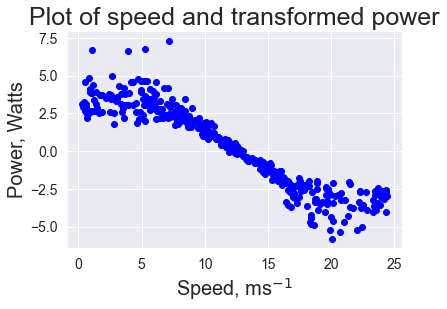

In [47]:
# X and y values for regression
X = lin_data.iloc[:, 0].values
y = lin_data.iloc[:, 1].values
# transform logistic to linear
y = np.log((100 / y) - 1)

# The X values are reshaped as 
# they only contain one feature
X = X.reshape(-1, 1)

scatter_plot(X, y, "blue", "o", "Transformed Power")
plt.title("Plot of speed and transformed power", fontsize=25);

As can be seen from the graph, the scatter plot resembles a linear function. 

### Algorithm <a name=alg2></a>
The linear regression is performed on this dataset:

In [48]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

regressor = LinearRegression()
regressor.fit(X_train, y_train)
print(regressor.intercept_)
print(regressor.coef_)

5.018790737078663
[-0.40031706]


Here, b (the intercept) is approximately 5 and a (the coefficient) is approximately -0.4. 

### Predictions <a name=pred2></a>

These values are used to create the predicted values of the logistic function which will then be compared
to the original dataset. In addition, accuracy metrics are calculated as before:

In [49]:
a = -0.4
b = 5
# get predicted values of y
y_pred = 100 / (1 + np.exp(a * X_test + b))
# transform test values of y back to
# logistic from linear
y_test = 100 / (1 + np.exp(y_test))
# detto for y
y = 100 / (1 + np.exp(y))
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print('Mean of observed y values:', np.mean(y))
# coefficient of variation 
print('Coefficient of variation:', (100*np.sqrt(metrics.mean_squared_error(y_test, y_pred)))/np.mean(y))

Mean Absolute Error: 4.642422806680821
Mean Squared Error: 32.704489819554674
Root Mean Squared Error: 5.718783945871244
Mean of observed y values: 46.03329187817259
Coefficient of variation: 12.423147927387081


Here, the coefficient of variation is 12.42%. This is below the threshold value of 25% so the sigmoid reression is an accurate model. It is also much less than the coefficient of variation for the linear regression on the untransformed data, which was 26.32%, indicating that the sigmoid regression is a more accurate model.

A visualisation of the predicted and observed y values are as follows:

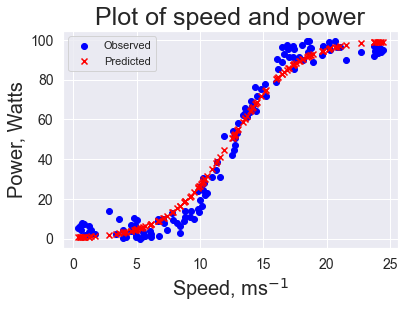

In [50]:
scatter_plot(X_test, y_test, "blue", "o", "Observed")
scatter_plot(X_test, y_pred, "red", "x", "Predicted")
plt.legend()
plt.show()

It is clear from the plot that the sigmoid regression model is reasonably accurate and more accurate than the linear regression model.

## Discussion <a name="discussion"></a>
The sigmoid regression model produces a coefficient of variation that is 14% less than the linear regression model so the sigmoid regression model is more accurate. In addition, the linear regression model is above the threshold value of 25% whereas the sigmoid regression model is 13% less than the threshold value so the sigmoid regression model meets the criterion for an accurate regression model.

In this project, the models use to create the regression models were based on simple algebraic functions, namely the linear and logistic functions. Further work will be done in the "Machine Learning and Statistics" project where more complex regression models are developed using decision trees and neural networks. 

## References <a name="references"></a>
[1] Scikit-learn.org. 2021. 1.1. Linear Models — Scikit-Learn 0.24.0 Documentation. [online] Available at: <https://scikit-learn.org/stable/modules/linear_model.html> [Accessed 1 January 2021]. <a name="1"></a><br>
[2] DeepAI. 2020. Sigmoid Function. [online] Available at: https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function [Accessed 28 December 2020]. <a name="2"></a><br>
[3] Ferguson, K., 2020. When Should You Delete Outliers From A Data Set? - Atlan | Humans Of Data. [online] Atlan | Humans of Data. Available at: https://humansofdata.atlan.com/2018/03/when-delete-outliers-dataset/ [Accessed 28 December 2020]. <a name="3"></a><br>
[4] Use, 1., 2021. How To Assess A Regression's Predictive Power For Energy Use - Kw Engineering. [online] kW Engineering. Available at: <https://www.kw-engineering.com/how-to-assess-a-regressions-predictive-power-energy-use/> [Accessed 1 January 2021]. <a name="4"></a><br>
[5] DeepAI. 2021. Deepai: The Front Page Of A.I.. [online] Available at: <https://deepai.org/machine-learning-glossary-and-terms/sigmoid-function.> [Accessed 1 January 2021]. <a name="5"></a><br>
[6] Pelinovsky, E., Kurkin, A., Kurkina, O., Kokoulina, M. and Epifanova, A., 2020. Logistic equation and COVID-19. Chaos, Solitons & Fractals, 140, p.110241. <a name="6"></a>